In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading data
data=pd.read_csv('share.csv')
data.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [3]:
data['Recent Trend (2)'].replace('**',np.nan,inplace=True)
data['Recent Trend (2)'].replace('*',np.nan,inplace=True)
data['Recent 5-Year Trend (2) in Death Rates'].replace('**',np.nan,inplace=True)
data['Recent 5-Year Trend (2) in Death Rates'].replace('*',np.nan,inplace=True)
data['Lower 95% Confidence Interval for Trend'].replace('**',np.nan,inplace=True)
data['Lower 95% Confidence Interval for Trend'].replace('*',np.nan,inplace=True)
data['Upper 95% Confidence Interval for Trend'].replace('**',np.nan,inplace=True)
data['Upper 95% Confidence Interval for Trend'].replace('*',np.nan,inplace=True)

In [4]:
data.isnull().sum()

County                                            0
FIPS                                              0
Met Objective of 45.5? (1)                        0
Age-Adjusted Death Rate                           0
Lower 95% Confidence Interval for Death Rate      0
Upper 95% Confidence Interval for Death Rate      0
Average Deaths per Year                           0
Recent Trend (2)                                447
Recent 5-Year Trend (2) in Death Rates          447
Lower 95% Confidence Interval for Trend         447
Upper 95% Confidence Interval for Trend         447
dtype: int64

In [5]:
#it does not make changes in your original file u have to put data=data.dropna().isnull().sum()

data.dropna().isnull().sum()

County                                          0
FIPS                                            0
Met Objective of 45.5? (1)                      0
Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
Average Deaths per Year                         0
Recent Trend (2)                                0
Recent 5-Year Trend (2) in Death Rates          0
Lower 95% Confidence Interval for Trend         0
Upper 95% Confidence Interval for Trend         0
dtype: int64

In [6]:
data['Lower 95% Confidence Interval for Trend']=data['Lower 95% Confidence Interval for Trend'].apply(lambda x:float(x))
data['Upper 95% Confidence Interval for Trend']=data['Upper 95% Confidence Interval for Trend'].apply(lambda x:float(x))
data['Recent 5-Year Trend (2) in Death Rates']=data['Recent 5-Year Trend (2) in Death Rates'].apply(lambda x:float(x))

In [7]:
X=data['Lower 95% Confidence Interval for Trend'].mean()
Y=data['Upper 95% Confidence Interval for Trend'].mean()
Z=data['Recent 5-Year Trend (2) in Death Rates'].mean()

In [8]:
print(X)
print(Y)
print(Z)

-2.755939123979214
0.8373051224944313
-1.0035263548626574


In [9]:
data['Lower 95% Confidence Interval for Trend'].replace(np.nan,X,inplace=True)
data['Upper 95% Confidence Interval for Trend'].replace(np.nan,Y,inplace=True)
data['Recent 5-Year Trend (2) in Death Rates'].replace(np.nan,Z,inplace=True)

In [10]:
data.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.400000,-2.600000,-2.200000
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.600000,-2.700000,1.600000
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.700000,0.000000,3.400000
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,NaN,-1.003526,-2.755939,0.837305
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.200000,-0.400000,4.800000


In [11]:
X1=data['Lower 95% Confidence Interval for Trend'].values
Y1=data['Upper 95% Confidence Interval for Trend'].values
Z1=data['Recent 5-Year Trend (2) in Death Rates'].values

In [13]:
#calculating b0 and b1 for x and y coordinates
num=0
den=0
for i in range(len(X1)):
    num+=(X1[i]-X)*(Y1[i]-Y)
    den+=(X1[i]-X)**2
b1=num/den
b0=Y-(b1*X)
print("B1=",b1,"B0=",b0)

B1= -0.006421479242367527 B0= 0.8196079166165703


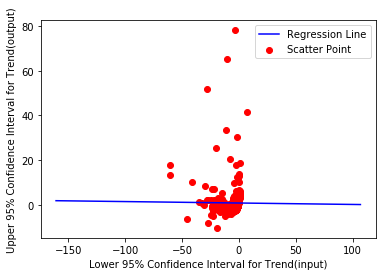

In [14]:
#plotting values
max_x=np.max(X1)+100
min_x=np.min(X1)-100
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x
plt.plot(x,y,color="blue",label="Regression Line")
plt.scatter(X1,Y1,color="red",label="Scatter Point")
plt.xlabel("Lower 95% Confidence Interval for Trend(input)")
plt.ylabel("Upper 95% Confidence Interval for Trend(output)")
plt.legend()
plt.show()

In [15]:
#calculating b0 and b1 for y and z coordinates
num=0
den=0
for i in range(len(Z1)):
    num+=(Z1[i]-Z)*(Z1[i]-X)
    den+=(Z1[i]-Z)**2
b1=num/den
b0=Y-(b1*Z)
print("B1=",b1,"B0=",b0)

B1= 1.0000000000000056 B0= 1.8408314773570944


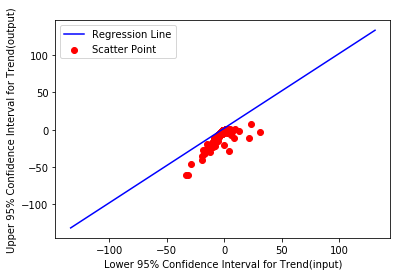

In [16]:
#plotting values
max_x=np.max(Z1)+100
min_x=np.min(Z1)-100
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x
plt.plot(x,y,color="blue",label="Regression Line")
plt.scatter(Z1,X1,color="red",label="Scatter Point")
plt.xlabel("Lower 95% Confidence Interval for Trend(input)")
plt.ylabel("Upper 95% Confidence Interval for Trend(output)")
plt.legend()
plt.show()